<a href="https://colab.research.google.com/github/mitinull/polyp-segmentation-AI-Project-/blob/main/polyp_segm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

# Dataset Familiarization

In [2]:
# Define directories of images and masks

IMGS_DIR = './drive/MyDrive/Kvasir-SEG/images/'
MSKS_DIR = './drive/MyDrive/Kvasir-SEG/masks/'

In [12]:
# Generate full path for all images and masks
# Sort paths to make coresponding images and mask

imgs_paths = [IMGS_DIR + filename for filename in sorted(os.listdir(IMGS_DIR))]
msks_paths = [MSKS_DIR + filename for filename in sorted(os.listdir(MSKS_DIR))]
print(imgs_paths[:3])
print(msks_paths[:3])

['./drive/MyDrive/Kvasir-SEG/images/cju0qkwl35piu0993l0dewei2.jpg', './drive/MyDrive/Kvasir-SEG/images/cju0qoxqj9q6s0835b43399p4.jpg', './drive/MyDrive/Kvasir-SEG/images/cju0qx73cjw570799j4n5cjze.jpg']
['./drive/MyDrive/Kvasir-SEG/masks/cju0qkwl35piu0993l0dewei2.jpg', './drive/MyDrive/Kvasir-SEG/masks/cju0qoxqj9q6s0835b43399p4.jpg', './drive/MyDrive/Kvasir-SEG/masks/cju0qx73cjw570799j4n5cjze.jpg']


In [46]:
# Generate a random index

img_idx = random.randint(0, len(imgs_paths) - 1)
img_idx

314

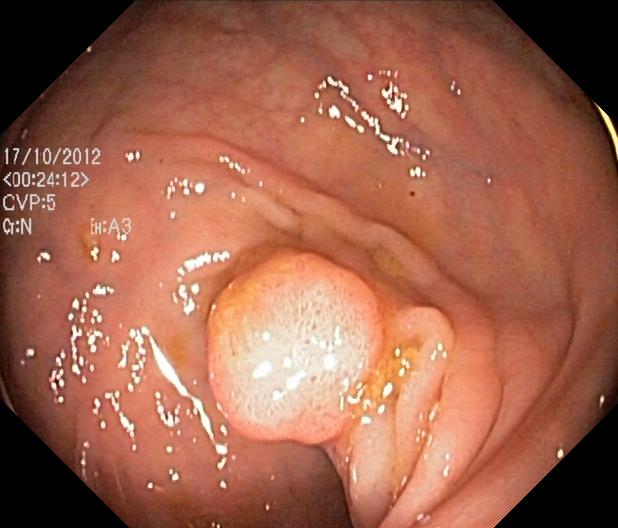

In [47]:
# Open and show the image corresponding to the img_idx in actual size

img = Image.open(imgs_paths[img_idx])
img

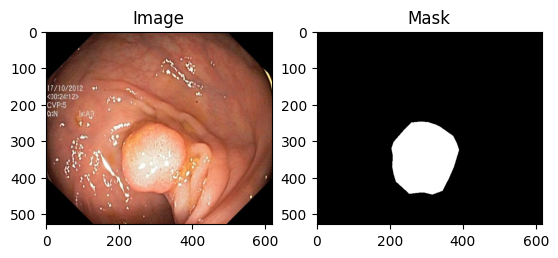

In [48]:
# Show the image and its mask together

# Load the image and mask
img = Image.open(imgs_paths[img_idx])
msk = Image.open(msks_paths[img_idx])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display the image and mask in separate subplots
ax1.imshow(img)
ax1.set_title('Image')

ax2.imshow(msk)
ax2.set_title('Mask')

# Show the figure
plt.show()


# Train-Validation-Test Split

In [59]:
# Split the data into train, validation, and test sets

imgs_train, imgs_valtest, msks_train, msks_valtest = train_test_split(imgs_paths, msks_paths, test_size=0.2, random_state=42)
imgs_val, imgs_test, msks_val, msks_test = train_test_split(imgs_valtest, msks_valtest, test_size=0.5, random_state=42)

print(f"imgs_train: {len(imgs_train)}")
print(f"msks_train: {len(msks_train)}")
print(f"imgs_val: {len(imgs_val)}")
print(f"msks_val: {len(msks_val)}")
print(f"imgs_test: {len(imgs_test)}")
print(f"msks_test: {len(msks_test)}")

imgs_train: 800
msks_train: 800
imgs_val: 100
msks_val: 100
imgs_test: 100
msks_test: 100


# Load Data

In [60]:
# Read the images and masks

imgs_train = [Image.open(path) for path in tqdm(imgs_train)]
msks_train = [Image.open(path) for path in tqdm(msks_train)]

imgs_val = [Image.open(path) for path in tqdm(imgs_val)]
msks_val = [Image.open(path) for path in tqdm(msks_val)]

imgs_test = [Image.open(path) for path in tqdm(imgs_test)]
msks_test = [Image.open(path) for path in tqdm(msks_test)]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

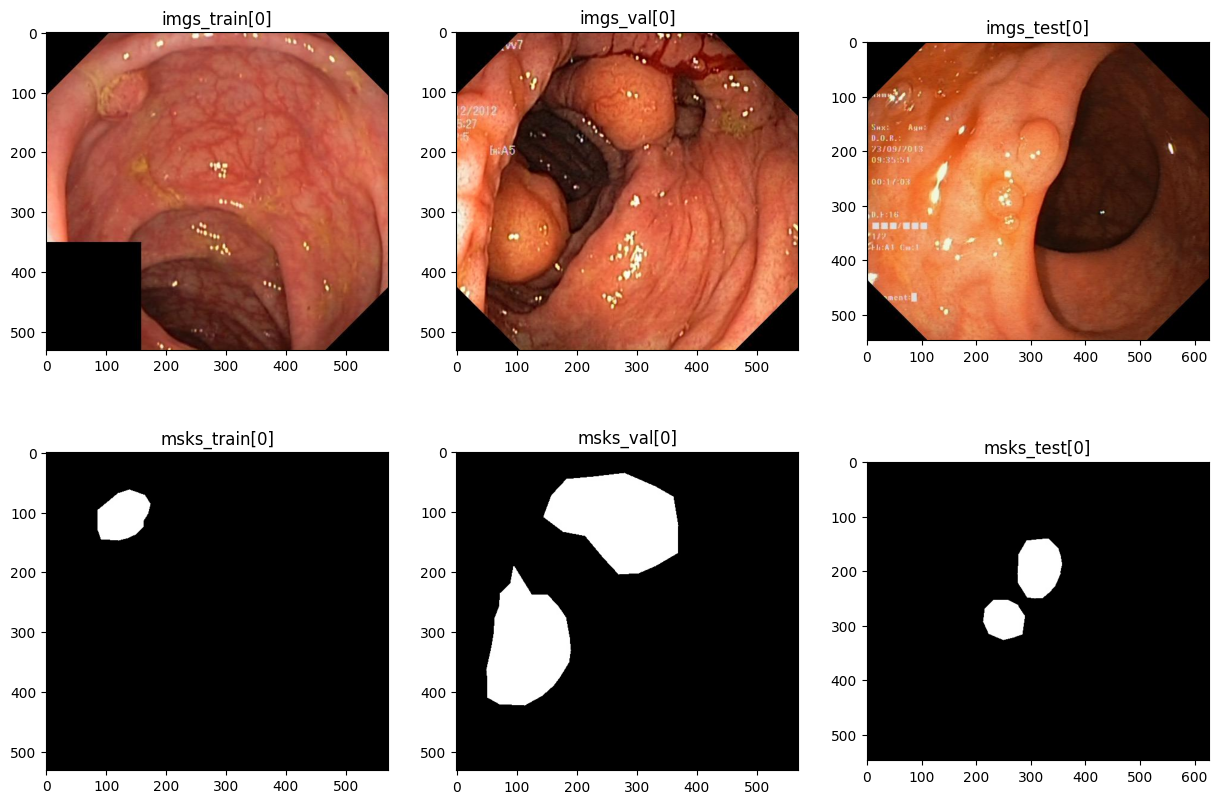

In [63]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the first image from each list
axs[0, 0].imshow(imgs_train[0])
axs[0, 0].set_title('imgs_train[0]')


axs[0, 1].imshow(imgs_val[0])
axs[0, 1].set_title('imgs_val[0]')

axs[0, 2].imshow(imgs_test[0])
axs[0, 2].set_title('imgs_test[0]')

axs[1, 0].imshow(msks_train[0])
axs[1, 0].set_title('msks_train[0]')

axs[1, 1].imshow(msks_val[0])
axs[1, 1].set_title('msks_val[0]')


axs[1, 2].imshow(msks_test[0])
axs[1, 2].set_title('msks_test[0]')

# Show the figure
plt.show()


# Preprocessing

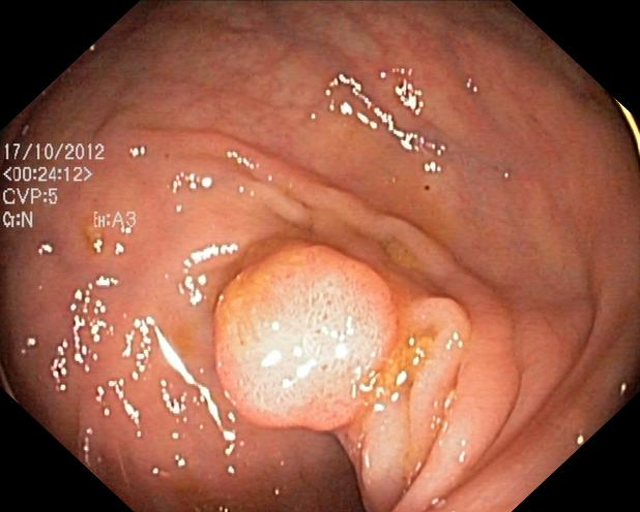

In [ ]:
# Regarding to the article re-scaled to 640 × 512,
# which respects the predominant rectangular aspect ratio
# in most polyp segmentation datasets

IMG_WIDTH = 640
IMG_HEIGHT = 512

def transform(img):
  img = img.resize((IMG_WIDTH, IMG_HEIGHT))
  return img

transform(img)

In [64]:
# Apply transform function to all lists

imgs_train = [transform(img) for img in tqdm(imgs_train)]
msks_train = [transform(msk) for msk in tqdm(msks_train)]

imgs_val = [transform(img) for img in tqdm(imgs_val)]
msks_val = [transform(msk) for msk in tqdm(msks_val)]

imgs_test = [transform(img) for img in tqdm(imgs_test)]
msks_test = [transform(msk) for msk in tqdm(msks_test)]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [77]:
# Print size of images inside each list

print(f"Size of images in imgs_train: {imgs_train[0].size}")
print(f"Size of images in msks_train: {msks_train[0].size}")
print(f"Size of images in imgs_val: {imgs_val[0].size}")
print(f"Size of images in msks_val: {msks_val[0].size}")
print(f"Size of images in imgs_test: {imgs_test[0].size}")
print(f"Size of images in msks_test: {msks_test[0].size}")


Size of images in imgs_train: (640, 512)
Size of images in msks_train: (640, 512)
Size of images in imgs_val: (640, 512)
Size of images in msks_val: (640, 512)
Size of images in imgs_test: (640, 512)
Size of images in msks_test: (640, 512)


In [2]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(640, 512))

# Plot the first image from each list
axs[0, 0].imshow(imgs_train[0])
axs[0, 0].set_title('imgs_train[0]')


axs[0, 1].imshow(imgs_val[0])
axs[0, 1].set_title('imgs_val[0]')

axs[0, 2].imshow(imgs_test[0])
axs[0, 2].set_title('imgs_test[0]')

axs[1, 0].imshow(msks_train[0])
axs[1, 0].set_title('msks_train[0]')

axs[1, 1].imshow(msks_val[0])
axs[1, 1].set_title('msks_val[0]')


axs[1, 2].imshow(msks_test[0])
axs[1, 2].set_title('msks_test[0]')

# Show the figure
plt.show()

NameError: name 'plt' is not defined

# Model Selection and Implementation